# Atividade Aula 29

In [1]:
 import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AirQualityUCI.csv', sep=';', decimal=',')
df.drop('Unnamed: 15', axis=1, inplace=True)
df.drop('Unnamed: 16', axis=1, inplace=True)

# É possível que no seu arquivo o separador de valores seja "," e o separador decimal seja ".".
# Se você obter erros verifique a formatação do seu arquivo e substitua as linhas
# acima por apenas (não precisa excluir as colunas unnamed):
# df = pd.read_csv('AirQualityUCI.csv', sep=',', decimal='.')


df.replace(-200,pd.NA, inplace=True)  # Na geração desses dados, foi escolhido usar o valor -200 para indicar
                                      # valores ausentes.

df.drop('NMHC(GT)',axis=1, inplace=True)  # Essa coluna possui dados de Hidrocarbonetos não-metano (NMHC).
                                          # Porém ~90% dos valores são nulos e vamos eliminá-la por completo

df["Time"] = df["Time"].str.replace(".",":", regex=False)

# Trocamos as coluna Date e Time por uma única coluna chamada Datetime
df["Datetime"]= pd.to_datetime(df["Date"] + " " + df["Time"],
                               format = "%d/%m/%Y %H:%M:%S")
df.drop(["Date","Time"], axis=1, inplace=True)

# Garantimos que todas as colunas numéricas sejam tratadas como tal
for col in df.columns:
  if col!="Datetime":
    df[col] = pd.to_numeric(df[col], errors="coerce")


#df.dropna(inplace=True)
df = df.interpolate()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9471 non-null   float64       
 1   PT08.S1(CO)    9471 non-null   float64       
 2   C6H6(GT)       9471 non-null   float64       
 3   PT08.S2(NMHC)  9471 non-null   float64       
 4   NOx(GT)        9471 non-null   float64       
 5   PT08.S3(NOx)   9471 non-null   float64       
 6   NO2(GT)        9471 non-null   float64       
 7   PT08.S4(NO2)   9471 non-null   float64       
 8   PT08.S5(O3)    9471 non-null   float64       
 9   T              9471 non-null   float64       
 10  RH             9471 non-null   float64       
 11  AH             9471 non-null   float64       
 12  Datetime       9471 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(12)
memory usage: 962.0 KB
None


            CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  9471.000000  9471.000000  9471.000000    9471.000000  9471.000000   
mean      2.131438  1102.673846    10.199868     943.404762   242.199979   
min       0.100000   647.000000     0.100000     383.000000     2.000000   
25%       1.100000   939.000000     4.500000     739.000000    96.057823   
50%       1.800000  1071.000000     8.400000     914.000000   181.727273   
75%       2.900000  1236.000000    14.000000    1117.000000   323.000000   
max      11.900000  2040.000000    63.700000    2214.000000  1479.000000   
std       1.423113   216.907224     7.460870     266.494895   203.097172   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   9471.000000  9471.000000   9471.000000   9471.00000  9471.000000   
mean     830.607222   110.334653   1449.395312   1029.93781    18.356984   
min      322.000000     2.000000    551.000000    221.00000    -1.900000   
25%      65

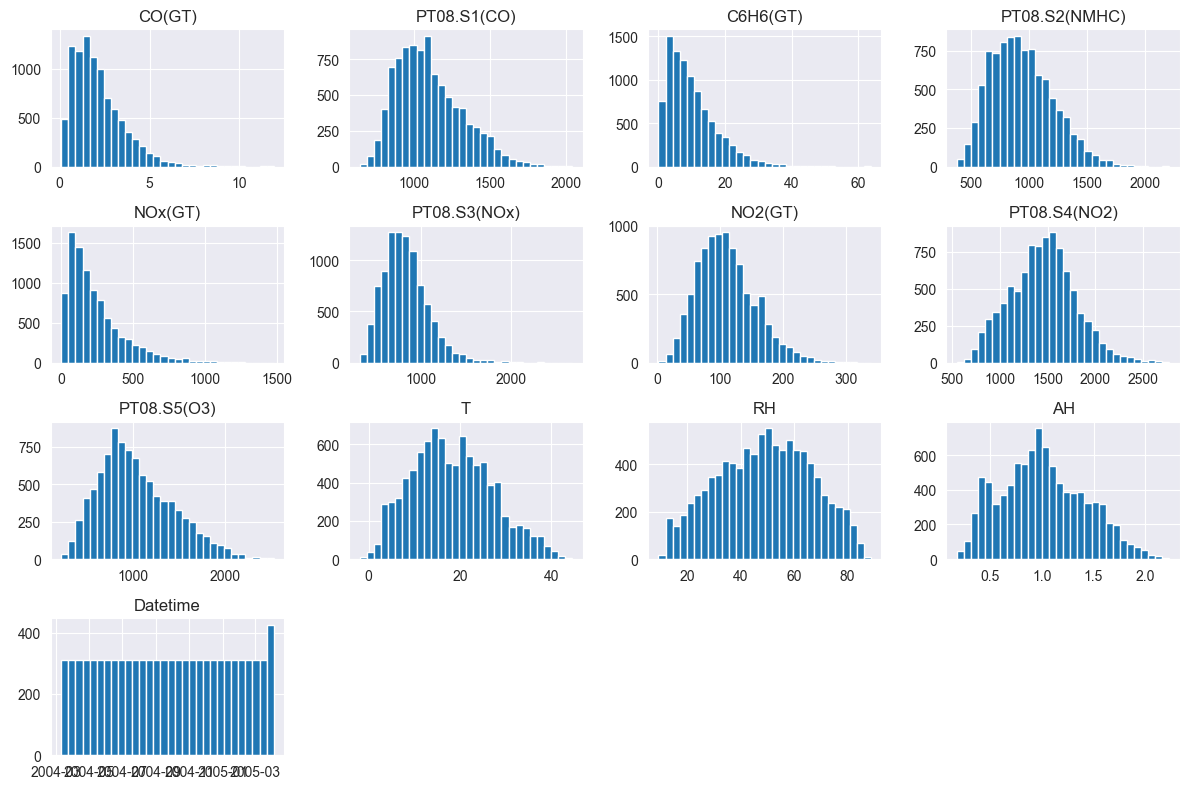

In [3]:
print(df.describe())
df.hist(figsize=(12,8) ,  bins=30)
plt.tight_layout()
plt.show()

<Axes: xlabel='FDS', ylabel='CO(GT)'>

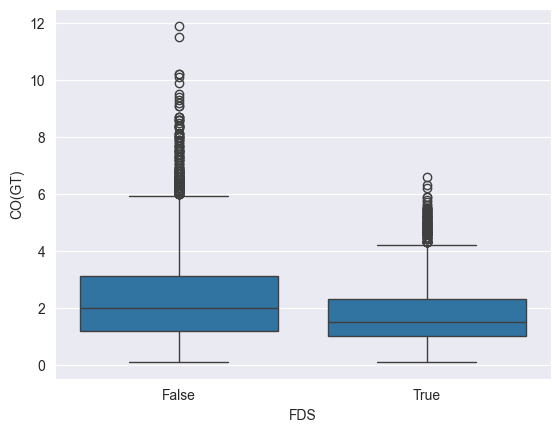

In [4]:
df["DDS"] = df["Datetime"].dt.dayofweek  # Segunda=0, Domingo=6

df["FDS"] = df["DDS"] >= 5  # Sábado(5) e Domingo(6) são FDS

sns.boxplot(x="FDS", y="CO(GT)", data=df)


In [5]:
import scipy.stats as stats

df = sns.load_dataset('tips')

gorgeta_almoco = df[df['time'] == 'Lunch']['tip']
gorgeta_jantar = df[df['time'] == 'Dinner']['tip']

t_stat, p_value = stats.ttest_ind(gorgeta_almoco, gorgeta_jantar, equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("Hipótese alternativa é valida.")
else:
    print("Hipótese nula é valida. Jantar ou almoço não afetam a gorgeta.")

t-statistic: -2.0593266215069774
p-value: 0.04126342245429952
Hipótese alternativa é valida.


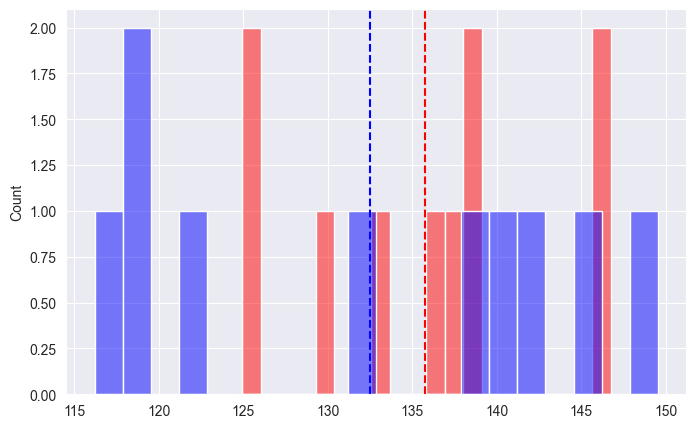

Hipótese nula é valida. Exercício fisico diminui a pressão
t-statistic: 0.6947594579627528
p-value: 0.4980823854868801


In [6]:
sedentario_pressao = np.random.normal(loc=135, scale=10, size=10)
atleta_pressao = np.random.normal(loc=128, scale=10, size=10)

t_stat, p_value = stats.ttest_ind(sedentario_pressao, atleta_pressao, equal_var=False)

plt.figure(figsize=(8, 5))
sns.histplot(sedentario_pressao, bins=20, alpha=0.5, color='red')
sns.histplot(atleta_pressao, bins=20, alpha=0.5, color='blue')

plt.axvline(x=np.mean(sedentario_pressao), color='red', linestyle='dashed')
plt.axvline(x=np.mean(atleta_pressao), color='blue', linestyle='dashed')

plt.grid(True)
plt.show()

if p_value < 0.05:
    print("Hipótese alternativa é valida.")
else:
    print("Hipótese nula é valida. Exercício fisico diminui a pressão")

print("t-statistic:", t_stat)
print("p-value:", p_value)

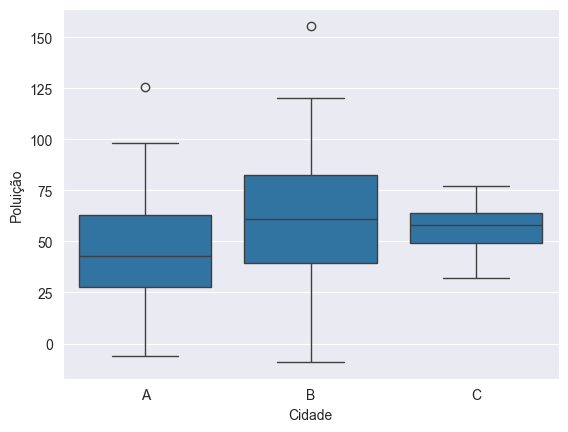

F-statistic: 5.906266004685619
p-value: 0.0034103072966612897


In [7]:
tam = 50
A = np.random.normal(loc=50, scale=30, size=tam)
B = np.random.normal(loc=60, scale=30, size=tam)
C = np.random.normal(loc=55, scale=10, size=tam)

dfp = pd.DataFrame({
    "Poluição": np.concatenate([A,B,C]),
    "Cidade": ['A']*tam + ['B']*tam + ['C']*tam
})

# print(dfp)

grupos = [dfp[dfp['Cidade'] == cidade]['Poluição'] for cidade in ['A', 'B', 'C']]

f_stat, p_value = stats.f_oneway(*grupos)

sns.boxplot(x='Cidade', y='Poluição', data=dfp)
plt.show()

print("F-statistic:", f_stat)
print("p-value:", p_value)

Chi-square statistic: 35.82142579642579
p-value: 1.6652376495998062e-08
Hipotese alternativa é valida


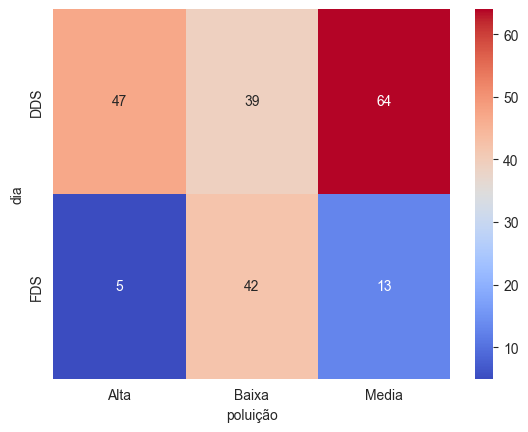

In [8]:
days = ['DDS'] * 150 + ['FDS']*60

poluicao = np.random.choice(['Baixa', 'Media', 'Alta'], size = 150, p=[0.3, 0.4, 0.3])
poluicao2 = np.random.choice(['Baixa', 'Media', 'Alta'], size = 60, p=[0.7, 0.2, 0.1])

dfcat = pd.DataFrame({'dia': days, 'poluição': pd.concat([pd.Series(poluicao),pd.Series(poluicao2)])})
cont = pd.crosstab(dfcat['dia'], dfcat['poluição'])
sns.heatmap(cont, annot=True, cmap='coolwarm', fmt='d')

chi2_stat, p_value, dof, expected = stats.chi2_contingency(cont)

print("Chi-square statistic:", chi2_stat)
print("p-value:", p_value)

if p_value < 0.05:
  print('Hipotese alternativa é valida')
else:
  print('Hipotese nula é valida')

# 1) Faça um teste de hipótese para determinar se o final de semana influencia no nível de poluentes.

In [ ]:
df['dia_semana'] = df['Datetime'].dt.weekday
df['fim_semana'] = df['dia_semana'].isin([5, 6])

def teste_final_semana(df, poluentes):
  dias_semana = df[~df['fim_semana']]
  dias_fim_semana = df[df['fim_semana']]

  t_stats = []
  p_values = []

  for poluente in poluentes:
    t_stat, p_value = stats.ttest_ind(dias_semana[poluente], dias_fim_semana[poluente], equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_value)

  return t_stats, p_values

poluentes = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S5(O3)']

t_stats, p_values = teste_final_semana(df, poluentes)

for poluente, t_stat, p_value in zip(poluentes, t_stats, p_values):
  print(f"Poluente: {poluente}")
  print(f"t-statistic: {t_stat}")
  print(f"p-value: {p_value}")
  if p_value < 0.05:
      print("Hipótese alternativa é valida.")
  else:
      print("Hipótese nula é valida. Não há diferença significativa.")
  print()



# 2) Teste a hipótese de que dias chuvosos afetam o nível de poluentes. Considere dias chuvosos como sendo aqueles que contenham pelo menos uma medida RH > 85

In [ ]:
def teste_chuvoso(df, poluentes):
  dias_chuvosos = df[df['RH'] > 85]
  dias_nao_chuvosos = df[df['RH'] <= 85]
  t_stats = []
  p_values = []

  for poluente in poluentes:
    t_stat, p_value = stats.ttest_ind(dias_chuvosos[poluente], dias_nao_chuvosos[poluente], equal_var=False)
    t_stats.append(t_stat)
    p_values.append(p_value)

  return t_stats, p_values

poluentes = ['CO(GT)', 'C6H6(GT)', 'NO2(GT)', 'NOx(GT)', 'PT08.S5(O3)']

t_stats, p_values = teste_chuvoso(df, poluentes)

for poluente, t_stat, p_value in zip(poluentes, t_stats, p_values):
  print(f"Poluente: {poluente}")
  print(f"t-statistic: {t_stat}")
  print(f"p-value: {p_value}")
  if p_value < 0.05:
    print("Hipótese alternativa é valida.")
  else:
    print("Hipótese nula é valida. Não há diferença significativa.")
  print()


Poluente: CO(GT)
t-statistic: -1.8980555181165248
p-value: 0.0720867627220752
Hipótese nula é valida. Não há diferença significativa.

Poluente: C6H6(GT)
t-statistic: -3.100605985761006
p-value: 0.0055973120995639015
Hipótese alternativa é valida.

Poluente: NO2(GT)
t-statistic: -2.436759669222889
p-value: 0.02419861762779602
Hipótese alternativa é valida.

Poluente: NOx(GT)
t-statistic: 1.3726972801823227
p-value: 0.1849671144023636
Hipótese nula é valida. Não há diferença significativa.

Poluente: PT08.S5(O3)
t-statistic: -3.4102214244145994
p-value: 0.002743806651996777
Hipótese alternativa é valida.



# 3) Indique os possíveis testes de hipóteses que você pode realizar em seu projeto integrador.

Para o meu projeto integrador, alguns possíveis testes de hipóteses que podem ser realizados incluem:

Verificar se a concentração de poluentes no ar (como CO, partículas de poeira, O₃, SO₂ e NO₂) está relacionada ao aumento de doenças respiratórias na região analisada.

Analisar se há uma correlação entre a qualidade do ar e a incidência de transtornos mentais na população da região.

Esses testes ajudarão a compreender os impactos da poluição na saúde e fornecerão insights importantes para a tomada de decisões e implementação de medidas preventivas.
